In [1]:
#todo:
#Rank of in 100 Users: #Restricted by: Mode & Level
#Rank-weighted / Rank-non-weighted
#Absolute Rank, ratio of rank
#Compare Ranker's rival ranking data
#How many wins and losses: /

#Personal Ranking Data:
#Collect all in-100 users' ranking data
#sort by rank / sort by level - rank


#DB:
#song, level, type, user_name, user_ID, score, rank
#https://piugame.com/leaderboard/over_ranking.php?lv=26&search=&&page=2
#20: 19페이지
#21: 19페이지
#22: 14페이지
#23: 10페이지
#24: 7페이지
#25: 4페이지
#26: 2페이지
#27over: 1페이지



In [2]:
def get_user_set_unit(rank):
    user_set = set()
    for item in rank:
        for instance in rank[item]:
            user_set.add(instance["username"] + " " + instance["userid"])

    return user_set

#전체 랭킹 데이터에 포함된 user명의 set을 구함 user_name + " " + user_id
def get_user_set(ranks):
    user_set = set()
    for rank in ranks:
        user_set = user_set.union(get_user_set_unit(rank))
    return user_set

#중복된 유저명이 있는지 확인
def get_duplicate_usernames_dict(user_set):
    user_dict = {}
    for user in user_set:
        username = user.split()[0]
        if username not in user_dict:
            user_dict[username] = [user.split()[1]]
        else:
            user_dict[username].append(user.split()[1])

    filtered_dict = {k: v for k, v in user_dict.items() if len(v) > 1}
    return filtered_dict

def find_user(data, username, user_id = None):
    if user_id != None:
        if type(user_id) == int:
            user_id = "#"+ str(user_id)
    #print(user_id)
    instances = []
    for item in data:
        for instance in data[item]:
            if instance["username"] == username and (user_id == None or instance["userid"] == user_id):
                instances.append(instance)
    return instances

#Username/user_id가 일치하는 랭킹 정보를 수집함
def find_user_all(ranks, username, user_id = None):
    ans = []
    for instance in ranks:
        instances = find_user(instance, username, user_id)
        ans.append(instances)
    flattened_ans = [val for sublist in ans for val in sublist]
    return flattened_ans

#모든 유저의 랭킹 정보를 수집함 모든 유저들을 포함하는 집합을 만들고 그 유저들의 랭킹 정보를 수집함
def collect_all_userdata(ranks):
    user_set = get_user_set(ranks)
    user_dict = {}
    for user in user_set:
        username = user.split()[0]
        user_id = user.split()[1]
        instances = find_user_all(ranks, username, user_id)
        user_dict[user] = instances
    return user_dict

In [3]:
import json

rank_27over = json.load(open("rankdata_27over.json"))
rank_26 = json.load(open("rankdata_26.json"))
rank_25 = json.load(open("rankdata_25.json"))
rank_24 = json.load(open("rankdata_24.json"))
rank_23 = json.load(open("rankdata_23.json"))
rank_22 = json.load(open("rankdata_22.json"))
rank_21 = json.load(open("rankdata_21.json"))
rank_20 = json.load(open("rankdata_20.json"))
rank_all = [rank_27over, rank_26, rank_25, rank_24, rank_23, rank_22, rank_21, rank_20]

print(find_user(rank_26, "OTDS", "#4011"))
total_rank_raw = collect_all_userdata(rank_all)


[{'song': '1949', 'mode': 'Double', 'level': 26, 'username': 'OTDS', 'userid': '#4011', 'score': 941162, 'rank': 16}, {'song': 'Achluoias', 'mode': 'Double', 'level': 26, 'username': 'OTDS', 'userid': '#4011', 'score': 944937, 'rank': 21}, {'song': 'Aragami', 'mode': 'Double', 'level': 26, 'username': 'OTDS', 'userid': '#4011', 'score': 922931, 'rank': 36}, {'song': 'BEMERA', 'mode': 'Double', 'level': 26, 'username': 'OTDS', 'userid': '#4011', 'score': 872688, 'rank': 60}, {'song': 'Brown Sky', 'mode': 'Double', 'level': 26, 'username': 'OTDS', 'userid': '#4011', 'score': 888079, 'rank': 34}, {'song': 'Chimera', 'mode': 'Double', 'level': 26, 'username': 'OTDS', 'userid': '#4011', 'score': 934605, 'rank': 30}, {'song': 'Cleaner', 'mode': 'Double', 'level': 26, 'username': 'OTDS', 'userid': '#4011', 'score': 951124, 'rank': 25}, {'song': 'Dement ~After Legend~', 'mode': 'Double', 'level': 26, 'username': 'OTDS', 'userid': '#4011', 'score': 932067, 'rank': 33}, {'song': 'Dignity', 'mode

In [23]:
#Check validity of songList_temp

import pandas as pd
song_csv = pd.read_csv('songList_temp.csv')

len_origin = 0
list_songs = list(song_csv["song"])
#Check if all songs are in the songlist
for rank in rank_all:
    checklist = []
    unchecklist = []
    songlist = list(rank.keys())
    len_origin += len(songlist)
    for item in songlist:
        checkme = item[:-9]
        #print(checkme)
        if checkme not in list_songs:
            checklist.append(checkme)
        else:
            unchecklist.append(checkme)

print(len_origin)
print(len(checklist))
print(len(unchecklist))
print(checklist)

song_csv["song"][1]

def get_song_info(song_csv, song_name):
    for i in range(len(song_csv["song"])):
        if song_csv["song"][i].lower() == song_name.lower():
            song_type = song_csv["song_type"][i]
            song_version = song_csv["version"][i]
            return song_type, song_version
    print("Song not found in the songlist")
    return "N/A", "N/A"

get_song_info(song_csv, "Requiem")



868
0
219
[]


('Arcade', 'PRIME - PRIME 2')

In [13]:
total_rank_raw["ABEL #9109"]

def add_songtype_and_version_unit(song_csv, user_rankdata):
    for instance in user_rankdata:
        songname = instance["song"]
        songtype, songversion = get_song_info(song_csv, songname)
        instance["type"] = songtype
        instance["version"] = songversion

def add_songtype_and_version(song_csv, user_rankdata):
    for item in user_rankdata:
        add_songtype_and_version_unit(song_csv, user_rankdata[item])

#add_songtype_and_version(song_csv, total_rank_raw)

In [10]:
#json.dump(total_rank_raw, open("total_rank_with_songdata.json", "w"))


NameError: name 'json' is not defined

In [25]:
#datatype = [[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
def DA():
    return [[0,0,0],[0,0,0],[0,0,0],[0,0,0]]

def songtype_to_int(songtype):
    if songtype == "Arcade":
        return 0
    elif songtype == "Remix":
        return 1
    elif songtype == "Full Song":
        return 2
    elif songtype == "Short Cut":
        return 3
    else:
        return -1
def version_to_int(version):
    if version == "PHOENIX":
        return 0
    elif version == "XX":
        return 1
    else:
        return 2

def get_single_double_count(ranks):
    checklist_list = []
    for rank in ranks:
        checklist = list(rank.keys())
        checklist_list.append(checklist)
    single_count = {20: DA(), 21: DA(), 22: DA(), 23: DA(), 24: DA(), 25: DA(), 26: DA()}
    double_count = {20: DA(), 21: DA(), 22: DA(), 23: DA(), 24: DA(), 25: DA(), 26: DA(), 27: DA(), 28: DA()}
    for instance in checklist_list:
        for item in instance:
            songname = item[:-9]
            if songname == "Requiem ": songname = "Requiem"
            if songname == "Phalanx \"RS2018 edit\"": songname = "Phalanx RS2018 edit"
            songtype,version = get_song_info(song_csv, songname)
            typeindex, versionindex = songtype_to_int(songtype), version_to_int(version)
            if typeindex == -1:
                print(songname, " has invalid songtype")

            level = int(item[-2:])
            type = item[-8:-2]
            if type == "Single":
                single_count[level][typeindex][versionindex] += 1
            elif type == "Double":
                double_count[level][typeindex][versionindex] += 1
    return {"Single": single_count, "Double": double_count}
total_steps_count = get_single_double_count(rank_all)



[[20, 24, 43], [0, 1, 2], [0, 1, 1], [0, 0, 6]]

In [29]:

json.dump(total_steps_count, open("total_steps_count.json", "w"))

In [55]:
def DA_0():
    return [[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
def DA_l():
    return [[[],[],[]],[[],[],[]],[[],[],[]],[[],[],[]]]

def songtype_to_int(songtype):
    if songtype == "Arcade":
        return 0
    elif songtype == "Remix":
        return 1
    elif songtype == "Full Song":
        return 2
    elif songtype == "Short Cut":
        return 3
    else:
        return -1
def version_to_int(version):
    if version == "PHOENIX":
        return 0
    elif version == "XX":
        return 1
    else:
        return 2

def restrict_level_range(levels):
    if levels[1] > 28: levels[1] = 28
    if levels[0] < 20:
        levels[0] = 20
    return levels

def add_dict(a, b):
    for item in b:
        if item in a:
            a[item] += b[item]
        else:
            a[item] = b[item]
    return a

def get_song_version_int_list(songtype, version):
    songtypeint = []
    for item in songtype:
        songtypeint.append(songtype_to_int(item))
    versionint = []
    for item in version:
        versionint.append(version_to_int(item))
    return songtypeint, versionint

version_all = ["PHOENIX", "XX", "OLD"]
songtype_all = ["Arcade", "Remix", "Full Song", "Short Cut"]

class UserRank:
    
    def __init__(self, key, rank_dict_list):
        self.key = key
        username, userID = key.split()
        self.username = username
        self.userID = userID
        self.single_data = {key: DA_l() for key in range(20, 27)}
        self.single_counts = {key: DA_0() for key in range(20, 27)}
        self.double_data = {key: DA_l() for key in range(20, 29)}
        self.double_counts = {key: DA_0() for key in range(20, 29)}
        self.read_rank_dict(rank_dict_list)

            
    def read_rank_dict(self, rank_dict_list):
        for item in rank_dict_list:

            level = item["level"]
            mode = item["mode"]
            typeint, versionint = songtype_to_int(item["type"]), version_to_int(item["version"])

            if mode == "Single":
                self.single_data[level][typeint][versionint].append(item)
                self.single_counts[level][typeint][versionint] += 1
            elif mode == "Double":
                self.double_data[level][typeint][versionint].append(item)
                self.double_counts[level][typeint][versionint] += 1

    def count_total(self):
        count = 0
        for level in range(20, 27):
            for songtype in range(4):
                for version in range(3):
                    count += self.single_counts[level][songtype][version]
        for level in range(20, 29):
            for songtype in range(4):
                for version in range(3):
                    count += self.double_counts[level][songtype][version]
        return count

        
    def to_dict(self):
        return {
            "key": self.key,
            "username": self.username,
            "userID": self.userID,
            "single_data": self.single_data,
            "single_counts": self.single_counts,
            "double_data": self.double_data,
            "double_counts": self.double_counts
        }
   
    def __str__(self):
        return f"{self.username} ({self.userID}): {self.count_total()}"



In [15]:
import json
total_rank = json.load(open("total_rank_with_songdata.json"))
users = []

for item in total_rank:
    users.append(UserRank(item, total_rank[item]))

users.sort(key = lambda x: x.count_total(), reverse = True)


In [59]:
users_to_json = [user.to_dict() for user in users]

json.dump(users_to_json, open("user_rankdata.json", "w"))

In [58]:
def find_user_index(users, username, user_id):
    for i in range(len(users)):
        if users[i].username == username and users[i].userID == user_id:
            return i
    return -1

print(find_user_index(users, "ABEL", "#9109"))
print(users[762].to_dict())
a = users[762].return_rankcount()
print(a)


762
{'key': 'ABEL #9109', 'username': 'ABEL', 'userID': '#9109', 'single_data': {20: [[[], [], []], [[], [], []], [[], [], []], [[], [], []]], 21: [[[], [], []], [[], [], []], [[], [], []], [[], [], []]], 22: [[[], [], []], [[], [], []], [[], [], []], [[], [], []]], 23: [[[], [], []], [[], [], []], [[], [], []], [[], [], []]], 24: [[[], [], []], [[], [], []], [[], [], []], [[], [], []]], 25: [[[], [], []], [[], [], []], [[], [], []], [[], [], []]], 26: [[[], [], []], [[], [], []], [[], [], []], [[], [], []]]}, 'single_counts': {20: [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], 21: [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], 22: [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], 23: [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], 24: [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], 25: [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], 26: [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]}, 'double_data': {20: [[[{'song': 'STAGER', 'mode': 'Double', 'level': 20, 'username': 'ABEL', 'userid': '#9109', 'sc

KeyError: 20

In [34]:
count = 0
for user in users:
    print(user)
    if count > 50:
        break
    count += 1

HAPPYF333TZ(#6356): 865
FRANKEZA(#9606): 818
MATTMILLER(#6255): 759
JQTRAN(#7478): 718
KANATA(#7986): 673
ZELLLOOO(#7581): 658
LAILAS(#2506): 638
RUN(#4678): 630
JERRYWHYMARI(#2070): 618
SUNMU(#7646): 615
TOMATONIUM(#3508): 577
GORANI(#8131): 574
SD1212(#2468): 568
KANATA(#7647): 567
HKPIU0127(#5879): 559
FEFEMZ(#1489): 552
CHOISUN(#9598): 542
SLIONS21(#5695): 540
NATURENIM(#1105): 539
MJGH0613(#9994): 529
YEIDEN(#6819): 527
LHA(#5213): 503
URUSA(#9487): 501
HATSUWU(#4424): 495
18(#3455): 492
SEOLJIHO(#9183): 488
FR0D0XXNVT(#9373): 484
DIGI(#4620): 482
SUNNY(#5412): 480
DLINZ(#6681): 475
BORDER(#5102): 470
SANGKM(#2636): 465
REY(#7343): 463
ROBLOX(#3216): 461
ZZANGK(#6918): 460
IMHEALTHMAN(#2788): 457
KANATA(#7637): 456
KIMSH(#8423): 446
BUDDY(#2635): 446
RSS(#3767): 440
NULL(#1029): 428
SANCTUS(#6017): 398
MASK(#3110): 397
AOD(#2085): 395
IRUSHIA(#6575): 381
XIUMIN99(#3852): 380
LGZZUSSS(#6884): 379
GAVIORIGINAL(#1286): 368
LEGEND12(#1612): 366
JOA(#8436): 362
LUISITOL(#1605): 361
ZHA

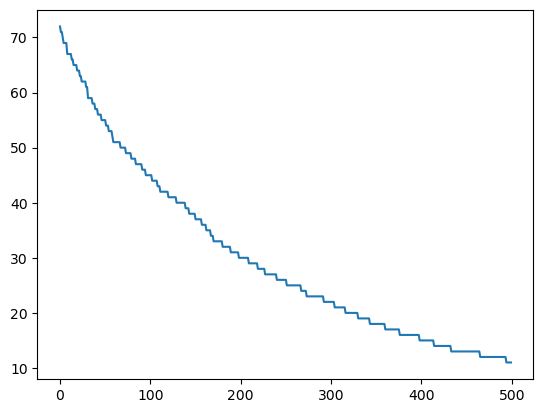

In [44]:
import matplotlib.pyplot as plt

def plot_user(users):
    full = []
    for user in users:
        full.append(user.count_total())
    plt.plot(full)
plot_user(users[300:800])

In [27]:
test = UserRank("ABEL", "#9109", total_rank_raw["ABEL #9109"])

test.full_counts


{20: 3, 21: 4, 22: 2, 23: 1, 24: 1, 25: 2, 26: 0, 27: 0, 28: 0}

In [11]:
def score_string(score):
    str_score = str(score)[-3:]
    return str(score//1000) + "," + str_score

#랭킹 데이터의 STR화
def rankstr(rankdata):
    score_str = score_string(rankdata["score"])
    print(f"{rankdata['song']} {rankdata['mode']}{str(rankdata['level'])}: rank {str(rankdata['rank'])}, score: {score_str}")

palami = find_user_all(rank_all, "HIMESAKANOA")


for i in palami:
    rankstr(i)
print()



8 6 - FULL SONG - Double23: rank 79, score: 988,974



In [1]:

def get_userRankDict_unit(rank):
    user_ranks = {}
    for item in rank:
        #print(rank[item])
        for instance in rank[item]:
            username = instance["username"]
            if username not in user_ranks:
                user_ranks[username] = 1
            else:
                user_ranks[username] += 1
    return user_ranks


userRanks = get_userRankDict_unit(rank_26)


#단순히 누가 몇개를 깼는지만을 전달
def get_userRankDict(ranks):
    ranks_sum = []
    for rank in ranks:
        rank_unit = get_userRankDict_unit(rank)
        ranks_sum.append(rank_unit)
    user_ranks = {}

    for rank in ranks_sum:
        for user in rank:
            if user not in user_ranks:
                user_ranks[user] = rank[user]
            else:
                user_ranks[user] += rank[user]


print(userRanks['FEFEMZ'])

print(get_user_set_unit(rank_26))
#print(get_user_set(rank_all))
print(len(get_user_set(rank_all)))

duplicates = get_duplicate_usernames_dict(get_user_set(rank_all))

duplicates

NameError: name 'rank_26' is not defined

868
0
219
[]


'Little Munchkin'

In [9]:
song_csv["song"][1]

def get_song_info(song_csv, song_name):
    for i in range(len(song_csv["song"])):
        if song_csv["song"][i].lower() == song_name.lower():
            song_type = song_csv["song_type"][i]
            song_version = song_csv["version"][i]
            return song_type, song_version
    return "N/A", "N/A"

get_song_info(song_csv, "8 6 - full song -")




('Full Song', 'XX')

In [ ]:
def find_song_is_substr(song_csv, song_name):
    for i in range(len(song_csv["song"])):
        songname = song_csv["song"][i]
        for j in range(len(song_csv["song"])):


In [57]:
samples = []

#특정 레벨의 인100 데이터들을 모아 sort후 정렬
def score_lister(rank, mode = None, subtitle= None, Threshold_top = None, Threshold_bottom = None):
    if subtitle != None:
        print(subtitle)
    print()
    samples = []
    for item in rank:
        length = len(rank[item])
        sample =  rank[item][length-1]
        if mode != None:
            if sample["mode"] == mode:
                samples.append({"song": sample['song'], "score": sample['score']})
        else:
            samples.append({"song": sample['song'], "score": sample['score']})

    samples.sort(key=lambda x: x['score'], reverse=True)
    if Threshold_top != None and Threshold_bottom != None and len(samples) > Threshold_top + Threshold_bottom:
        samples_top = samples[:Threshold_top] 
        samples_bottom = samples[-Threshold_bottom:]
        print("TOP" + str(Threshold_top) + " in100 cutlines")
        print()
        for i in samples_top:
            print(i['song'], score_string(i['score']))
        print()
        print("BOTTOM" + str(Threshold_bottom) + " in100 cutlines")
        print()
        for j in samples_bottom:
            print(j['song'], score_string(j['score']))
    else:
        print("in100 cutlines (ALL)")
        for i in samples:
            print(i['song'], score_string(i['score']))
    print()


In [ ]:
'''
score_lister(rank_22, "Double", "22 (Double)", 10, 50)
score_lister(rank_21, "Double", "21 (Double)", 10, 50)
score_lister(rank_20, "Double", "20 (Double)", 10, 50)

score_lister(rank_22, "Single", "22 (Single)", 10, 50)
score_lister(rank_21, "Single", "21 (Single)", 10, 50)
score_lister(rank_20, "Single", "20 (Single)", 10, 50)

print("쓸데없는 것들")
score_lister(rank_27over, "Double", "27over")
score_lister(rank_26, subtitle = "26 (Double, Single)")



score_lister(rank_25, "Double", "25 (Double)")
score_lister(rank_24, "Double", "24 (Double)")
score_lister(rank_23, "Double", "23 (Double)")

score_lister(rank_25, "Single", "25 (Single)")
score_lister(rank_24, "Single", "24 (Single)")
score_lister(rank_23, "Single", "23 (Single)")
'''

{'EIQUESON', 'PEKORA', 'TENSHI', 'SUNA827', 'NEWAMI', 'XXLALOXX', 'GARY', 'SATESATESATE', 'BASAURIO', 'YUNAHIRO', 'SHANKS', 'GUERO40', 'ELEMPALADOR', 'SPHYNXINATOR', 'BADIN', 'ZZZ', 'H3LLBOY', 'SUPREME', 'ZAKA', 'MUNLAI', 'KINDWAVE', 'EXPLOREZ', 'NEVSISTER', 'LGZZUSSS', 'ROJOXD', 'UB3RR4VE', 'DDORAI', 'PICO', 'VERMEIL', 'CHOCOMYNT', 'DUSIZERG', 'SLOW', 'AYOTLA', 'GATOP', 'CLUCLE', 'DENNHEC', 'EXCEED', 'CHOCHO', 'SHINE', 'CIOC', 'SALADY', 'JYNKO', 'SEWOL', 'JAMDOLL', 'AKZEL', 'SEXYJINNY', 'THELOSTCAVE', 'JOMSU', '2014', 'AIRMONKY', 'KCM', 'ITALIAN0', 'FLAME', 'DONGTUNA', 'KORILAK', 'LEVI', 'YOUYORIN', 'R2RO', 'CREDIT', 'YOOSSUWU', 'CUMULONIMBUS', 'YINYANG', 'NETAMINI', 'DLINZ', 'XTREMEGAMES', 'AWNER', 'ROSY', 'JEFFKOOPA44', 'NAMI', 'BLUEFL4ME', 'GRRNOT', 'LEGO', 'BUKAA', 'CODEARK2', 'SUCIODAN', 'LEECHAEYOUNG', 'TERM115', 'JIWOO', 'MIISAKIICHAN', 'SKYE', 'CHANSU', 'HANABI', 'CPATOS38', 'ANDYHC10', 'BLACKBEAN', 'NASEONGYEDAN', 'ELCHARLY', 'JFEMBOY', 'USHINOREIRA', 'ZENITTSUXD', 'KNUX', 'M

In [1]:
a = {2: 3, 4:5}

print(sum(a.values()))

8
